## First lets see what regret looks like for each of the meta experts, (should be sublinear)

## Generate synth data, Anh with ridge meta experts, then check each experts loss

In [1]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : False, 
        'S_lo': 0.0, 'S_hi':0.0,
        'label_noise_width':0.16, 'drop_sensitive':False
        }
syn_ob = SynthGenLinear(**params)
print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
df = syn_ob.df

[4 7 1 2 5 0 6 3] ['two-or-more' 'native-am' 'female' 'white' 'some-other' 'male' 'asian'
 'black']


In [5]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [9]:
df[filter_feature+filter_label+filter_group].describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_max_active,y_dperm_active,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.000677e-01,0.500627,0.501350,0.500583,0.497951,0.500681,0.500917,0.499536,4.997043e-01,0.501011,...,0.472036,0.441783,0.49847,0.50153,0.608470,0.120610,0.099740,0.080290,0.060500,0.030390
std,2.881755e-01,0.287926,0.289282,0.288694,0.288530,0.288524,0.288814,0.288036,2.890978e-01,0.289102,...,0.125646,0.131416,0.50000,0.50000,0.488095,0.325675,0.299655,0.271743,0.238412,0.171659
min,2.824600e-08,0.000021,0.000023,0.000013,0.000003,0.000009,0.000031,0.000005,2.153619e-07,0.000002,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.506379e-01,0.252347,0.251342,0.250511,0.248084,0.251277,0.251111,0.250633,2.493589e-01,0.250057,...,0.384019,0.348409,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000474e-01,0.500424,0.502060,0.501539,0.497919,0.500780,0.501263,0.498523,4.989958e-01,0.502603,...,0.471056,0.431761,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.483870e-01,0.749636,0.751962,0.750821,0.746383,0.751090,0.751619,0.748454,7.496221e-01,0.752019,...,0.557758,0.526526,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999995e-01,0.999996,0.999991,0.999993,0.999983,0.999996,0.999992,0.999998,9.999894e-01,0.999998,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from bilevel.OnlineLinearExpert import *
from bilevel.OnlineTreeExpert import *
from bilevel.build_all_models import *

In [ ]:
# TODO, ensure everywhere its min max scaled

In [10]:
def get_all_aggregations_linear(df, filter_x, l2_pen = 0.0):
    # y_lab_list = ['y_dperm_active', 'y_mean_active', 'y_min_active', 'y_max_active']
    y_lab_list = ['y_min_active']
    X_dat = df[filter_x]
    # X_dat = numeric_scaler(X_dat, X_dat.columns), synth df already has each feature and label in [0, 1]
    A_t = syn_ob.A_t
    baseline_dict = dict.fromkeys(y_lab_list)
    Anh_dict = dict.fromkeys(y_lab_list)
    for y_lab in y_lab_list:
        y_dat = df[y_lab]
        # y_dat = df[[y_lab]]
        # y_dat = numeric_scaler(y_dat, y_dat.columns)
        # y_dat = y_dat[y_lab]
        dirname_baseline = './synthetic_res_models/baseline'
        filename = 'aggregated_0-1x_w0-1' + y_lab
        baseline_dict[y_lab] = build_baseline_alwayson(dirname_baseline, filename, A_t, OnlineLinearExpert(X_dat, y_dat, l2_pen = l2_pen))
        dirname_Anh = './synthetic_res_models/Anh/'
        Anh_dict[y_lab] = build_Anh(dirname_Anh, filename, A_t, [OnlineLinearExpert(X_dat, y_dat, l2_pen = l2_pen) for _ in range(A_t.shape[1])])
    return baseline_dict, Anh_dict

def barplot_aggregations(baseline_dict, Anh_dict):
    A_t = syn_ob.A_t
    for y_lab in baseline_dict.keys():
       base_ends = [baseline_dict[y_lab].expert.cumloss_groupwise[g][-1] for g in range(A_t.shape[1])]
       Anh_ends = [Anh_dict[y_lab].Anh.cumloss_groupwise_ada[g][-1] for g in range(A_t.shape[1])]
       ind = np.arange(1, A_t.shape[1]+1)
       plt.bar(ind,  base_ends)
       plt.bar(ind, Anh_ends)
       plt.title(y_lab)
       plt.show()

def baseline_vs_Anh_printagg(baseline_dict, Anh_dict):
    A_t = syn_ob.A_t
    for y_lab in baseline_dict.keys():
       active_rounds = [len(baseline_dict[y_lab].expert.cumloss_groupwise[g]) for g in range(A_t.shape[1])]
       base_ends = [baseline_dict[y_lab].expert.cumloss_groupwise[g][-1] for g in range(A_t.shape[1])]
       Anh_ends = [Anh_dict[y_lab].Anh.cumloss_groupwise_ada[g][-1] for g in range(A_t.shape[1])]
       print(y_lab)
       print("Active", active_rounds)
       print("Base:", base_ends)
       print("Anh:", Anh_ends)
       print("---------------")

In [11]:
# try with Ridge experts l2_pen = 1
baseline_dict_ridge, Anh_dict_ridge = get_all_aggregations_linear(df, filter_feature+filter_group, l2_pen = 1.0)


100%|██████████| 100000/100000 [00:56<00:00, 1772.91it/s]


y_min_active
Active [49847, 50153, 60847, 12061, 9974, 8029, 6050, 3039]
Base: [633.0768272019001, 527.5334748982798, 703.6091137183737, 138.57882895501436, 117.02017688905227, 97.15502779177541, 73.15782596216395, 31.089328783795526]
Anh: [531.2312938732271, 486.861885902701, 668.5147589896216, 126.34589341106053, 84.87572090565746, 62.07756018643664, 48.32372217869617, 27.95552410445409]
---------------


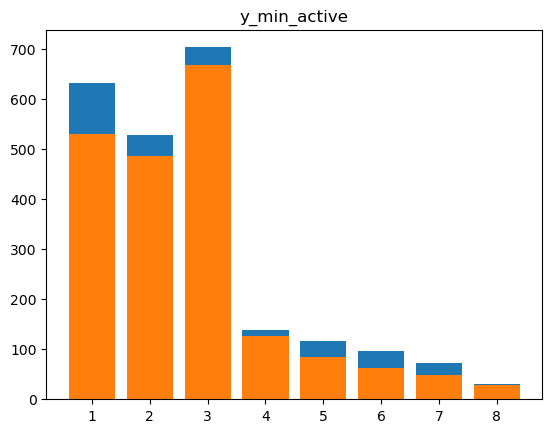

In [12]:
baseline_vs_Anh_printagg(baseline_dict_ridge, Anh_dict_ridge)
barplot_aggregations(baseline_dict_ridge, Anh_dict_ridge)

100%|██████████| 100000/100000 [00:54<00:00, 1825.12it/s]


y_min_active
Active [49847, 50153, 60847, 12061, 9974, 8029, 6050, 3039]
Base: [131.98905136536314, 118.19898280265008, 134.39331782950316, 23.75551264307129, 39.883987635341114, 25.848611233366828, 20.50074203847821, 5.805862788251185]
Anh: [72.72950482442474, 66.5650101842205, 86.48325435992268, 16.53671062514419, 13.232988211496643, 9.366649138232951, 8.070562312349015, 5.60435036149935]
---------------


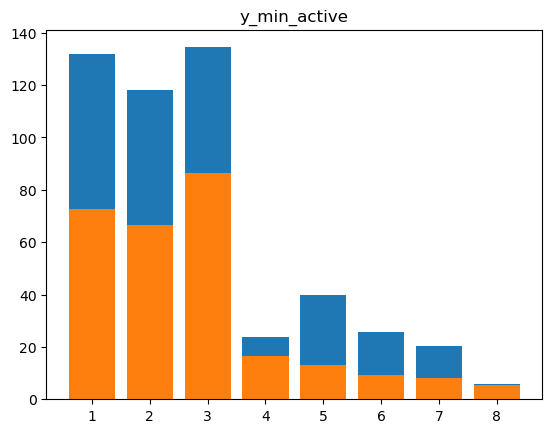

In [13]:
# try with LS, l2 pen = 0 
baseline_dict_ls, Anh_dict_ls = get_all_aggregations_linear(df, filter_feature+filter_group, l2_pen = 0.0)
baseline_vs_Anh_printagg(baseline_dict_ls, Anh_dict_ls)
barplot_aggregations(baseline_dict_ls, Anh_dict_ls)

## Regret asymptotics
 1. check if ```Anh groupwise - its ridge meta group experts loss``` is like $\sqrt{T_g}$ Yes!
 2. ``ridge meta group expert - best in hindsights`` < $||\theta||^2 + \log{(T_g+1)}$ 

### 1 Anh - its ridge meta experts loss

In [14]:
def Anh_minus_groupexpert_plot(Anh):
    N = Anh.A_t.shape[1]
    cumloss_groupwise_ada = Anh.cumloss_groupwise_ada
    cumloss_groupwise_metaexp = Anh.cumloss_groupwise_metaexp
    for gnum in range(N):
        Tg = cumloss_groupwise_ada[gnum].shape[0]
        print(f'''Number of rounds {Tg}, ada shape {cumloss_groupwise_ada[gnum].shape}, meta exp shape {cumloss_groupwise_metaexp[gnum].shape}''')
        diff_at_eacht = cumloss_groupwise_ada[gnum] - cumloss_groupwise_metaexp[gnum]
        plt.plot(np.arange(Tg), diff_at_eacht)
        plt.show()

Number of rounds 49847, ada shape (49847,), meta exp shape (49847,)


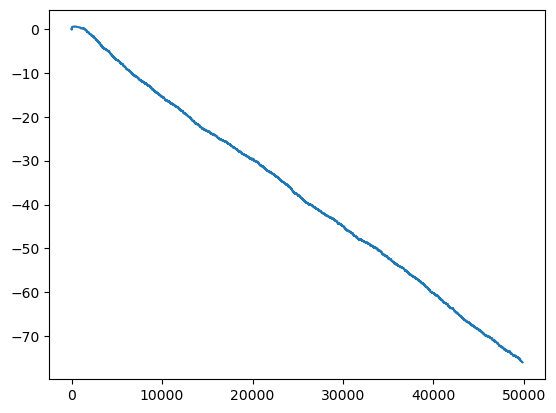

Number of rounds 50153, ada shape (50153,), meta exp shape (50153,)


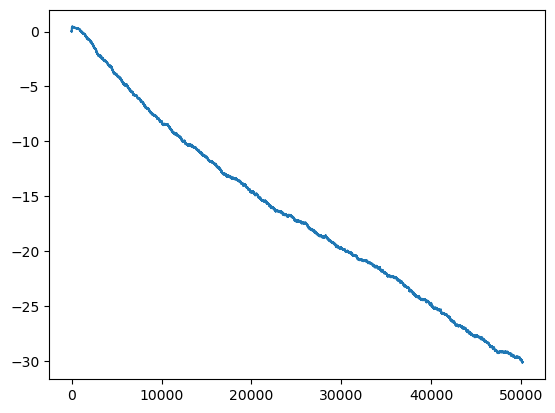

Number of rounds 60847, ada shape (60847,), meta exp shape (60847,)


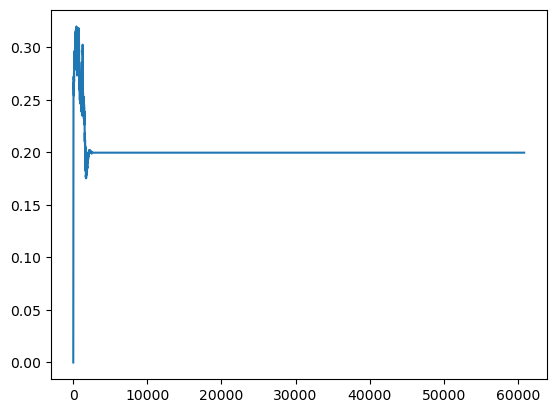

Number of rounds 12061, ada shape (12061,), meta exp shape (12061,)


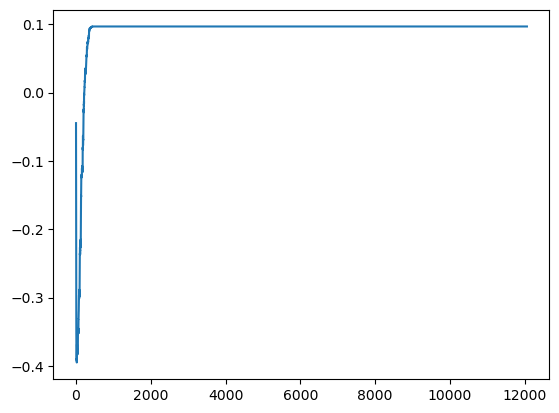

Number of rounds 9974, ada shape (9974,), meta exp shape (9974,)


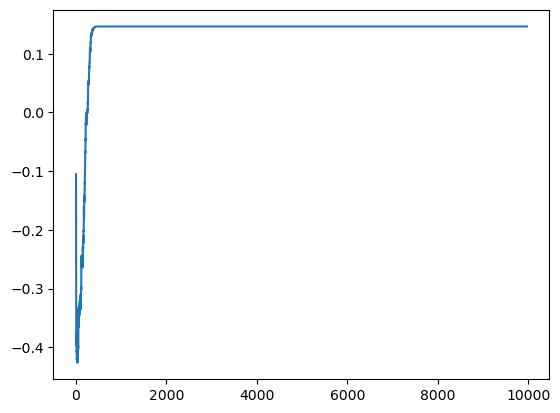

Number of rounds 8029, ada shape (8029,), meta exp shape (8029,)


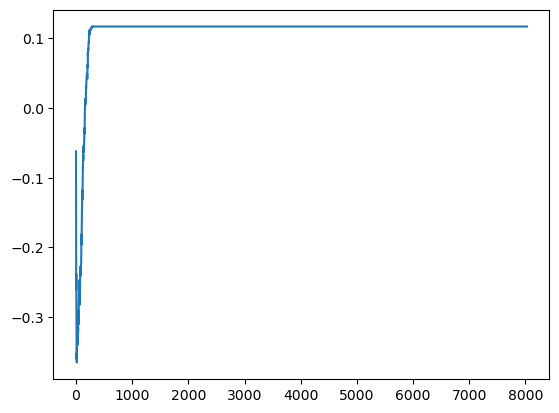

Number of rounds 6050, ada shape (6050,), meta exp shape (6050,)


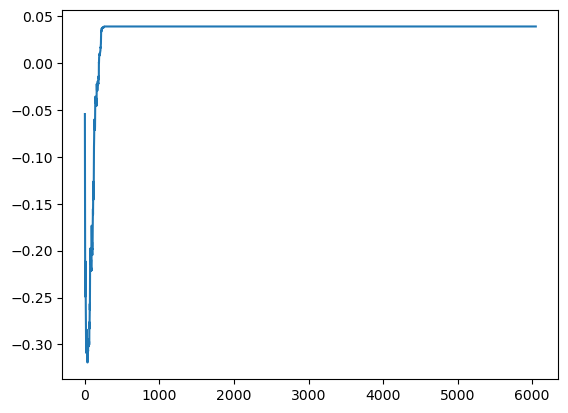

Number of rounds 3039, ada shape (3039,), meta exp shape (3039,)


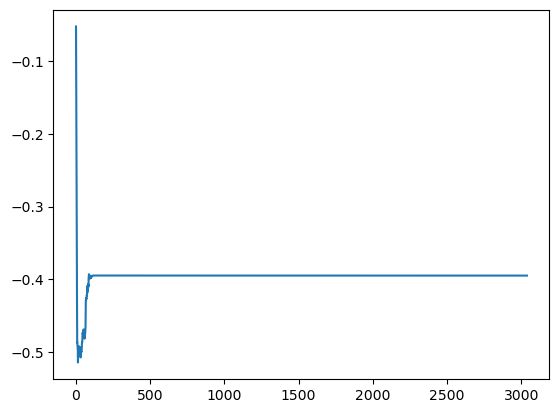

In [15]:
Anh_minus_groupexpert_plot(Anh_dict_ridge['y_min_active'].Anh)

Number of rounds 49847, ada shape (49847,), meta exp shape (49847,)


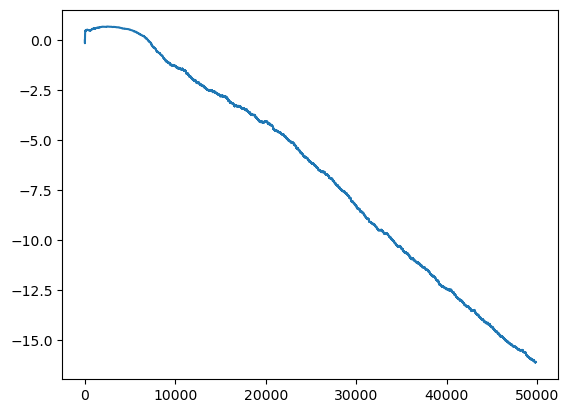

Number of rounds 50153, ada shape (50153,), meta exp shape (50153,)


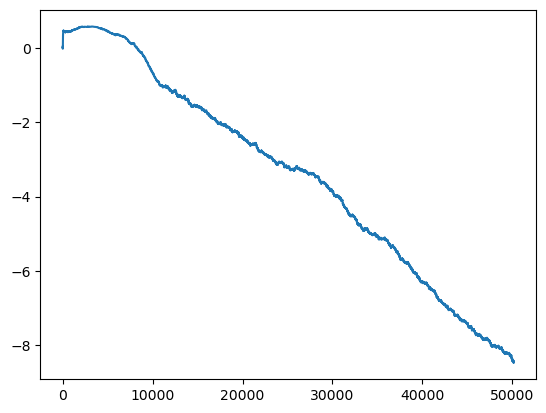

Number of rounds 60847, ada shape (60847,), meta exp shape (60847,)


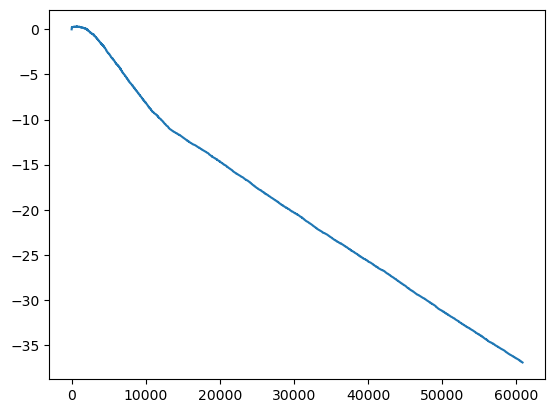

Number of rounds 12061, ada shape (12061,), meta exp shape (12061,)


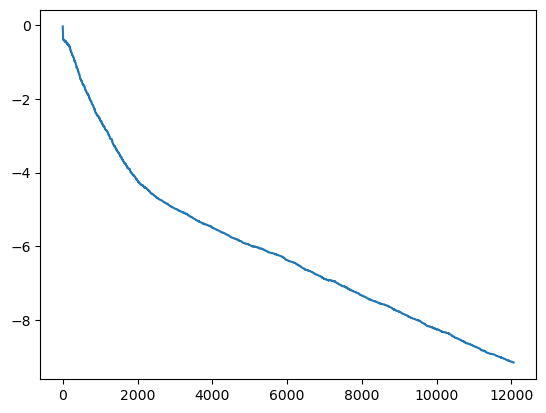

Number of rounds 9974, ada shape (9974,), meta exp shape (9974,)


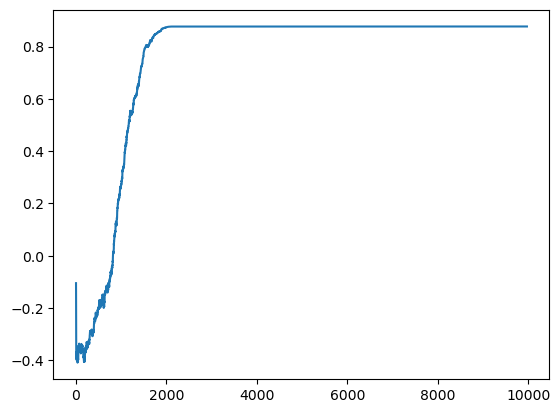

Number of rounds 8029, ada shape (8029,), meta exp shape (8029,)


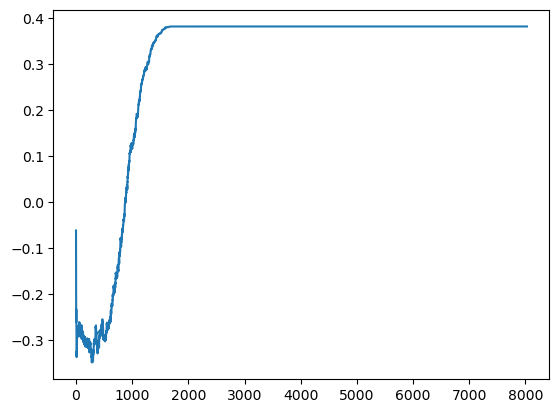

Number of rounds 6050, ada shape (6050,), meta exp shape (6050,)


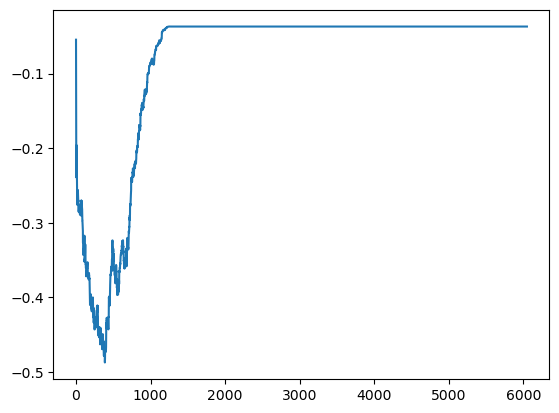

Number of rounds 3039, ada shape (3039,), meta exp shape (3039,)


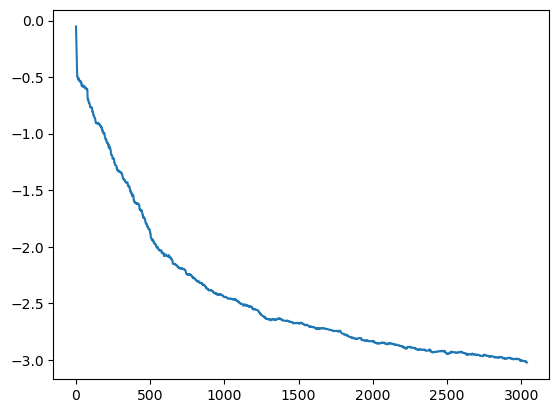

In [16]:
Anh_minus_groupexpert_plot(Anh_dict_ls['y_min_active'].Anh)

### 2. ridge meta expert - best in hindsight loss

In [36]:
from sklearn.linear_model import LinearRegression

def plot_Anh_minus_besthindsight(cl_ada_g: np.array, cl_metaexp_g: np.array, X_dat_g, y_dat_g, num_points = 10):
    '''
        cl_ada_g: array of shape (Tg,) having the cumulative loss of Anh on this group subsequence
        cl_metaexp_g: array of shape (Tg,) having the cumulative loss of this group meta expert
        X_dat_g: rows of the original dataframe where only group g is active
    '''
    Tg = len(X_dat_g)
    print(Tg, cl_ada_g.shape, cl_metaexp_g.shape)
    sse = [] # sum of squared errors for the best in hindsight, saved in this
    thetasq = [] # thetanorm squared
    pos = np.linspace(Tg // num_points, Tg-1, dtype = int, num = num_points) # positions in the dataframe to find best in hindsight 
    for p in pos:
        X_batch = X_dat_g[:p]
        y_batch = y_dat_g[:p]
        lr = LinearRegression()
        lr.fit(X_batch, y_batch)
        sse.append(np.sum((lr.predict(X_batch) - y_batch)**2))
        thetasq.append(np.linalg.norm(lr.coef_)**2)
    sse = np.array(sse)
    thetasq = np.array(thetasq)
    print(f"pos : {pos}")
    print(f"cl ada: {cl_ada_g[pos]}")
    print(f"cl meta exp: {cl_metaexp_g[pos]}")
    print(f"sse {sse}")
    print(f"thetasq  {thetasq}")
    print(f"Anh group - best hindsight loss {(cl_ada_g[pos] - sse)}")
    print(f"group meta exp - best hindsight loss {(cl_metaexp_g[pos] - sse)}")
    # print(pos, cl_metaexp_g[pos] - sse -thetasq)
    plt.plot(pos, cl_ada_g[pos] - sse - thetasq, label = 'ada group regret')
    plt.plot(pos, cl_metaexp_g[pos] - sse - thetasq, label = 'meta exp regret')
    # plt.plot(pos, pos**0.5, label = 'sqrt pos')
    plt.legend()
    plt.show()

    plt.plot(pos, cl_ada_g[pos] - sse, label = 'ada group regret')
    plt.plot(pos, cl_metaexp_g[pos] - sse, label = 'meta exp regret')
    # plt.plot(pos, pos**0.5, label = 'sqrt pos')
    plt.legend()
    plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
X_dat_g = df[df['g_male'] == 1][filter_feature + filter_group]
y_dat_g = df[df['g_male'] == 1]['y_min_active']
lr = LinearRegression()
lr.fit(X_dat_g, y_dat_g)
lr.score(X_dat_g, y_dat_g)

0.9029113646389644

In [22]:
print(lr.predict(X_dat_g).shape, y_dat_g.shape, lr.predict(X_dat_g))
print(filter_group)

(49847,) (49847,) [0.4660244  0.53758812 0.49443483 ... 0.48016882 0.51293278 0.39178419]
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


49847 (49847,) (49847,)
pos : [ 2492  4984  7476  9968 12461 14953 17445 19938 22430 24922 27415 29907
 32399 34892 37384 39876 42369 44861 47353 49846]
cl ada: [ 25.3894629   51.11734486  77.85953974 103.50724207 130.67716629
 157.81082768 184.2921167  212.12965346 239.11121914 265.54212082
 292.12543164 319.47779687 346.90858192 373.11541573 400.11774158
 425.82484916 453.03425734 479.16391637 504.93275218 531.23129387]
cl meta exp: [ 27.34878972  58.15601478  89.32152547 118.90096294 149.94172512
 181.05033147 210.55751954 241.8492451  272.34675337 303.14468815
 333.53205425 364.31121012 395.43363492 424.99575067 456.05691952
 485.91367287 517.37392478 547.43771462 577.12211116 607.20481297]
sse [ 3.85013785  7.67782152 11.49290428 15.14557012 19.13041121 22.81213343
 26.33238283 30.04063375 33.72001837 37.65592058 41.42280649 45.3749901
 49.24818801 52.92149565 56.84019357 60.71633303 64.52898574 68.20267853
 71.88235387 75.32670592]
thetasq  [5.24079006e+23 9.08237721e+22 9.738700

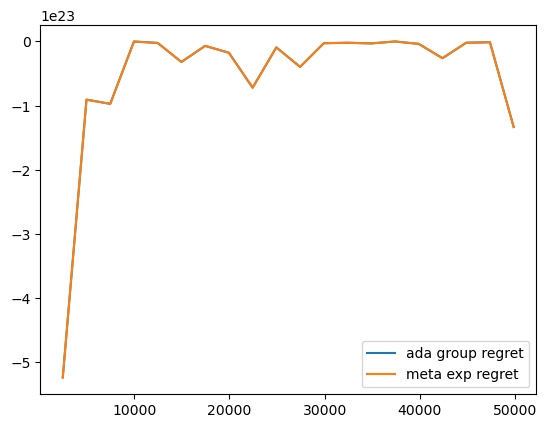

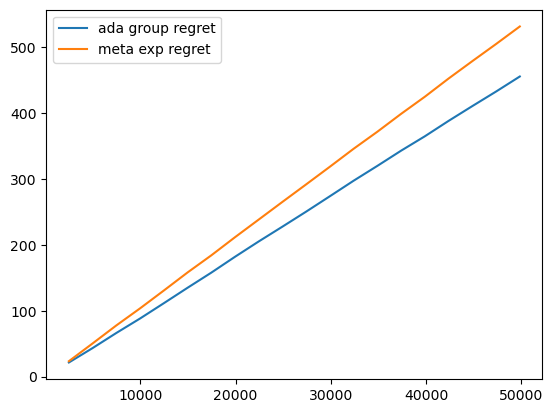

50153 (50153,) (50153,)
pos : [ 2507  5014  7522 10029 12537 15045 17552 20060 22568 25075 27583 30090
 32598 35106 37613 40121 42629 45136 47644 50152]
cl ada: [ 22.08738159  45.36665266  68.96657392  93.3666208  117.62147674
 142.19425678 165.99457222 190.41039007 215.406625   239.25795677
 263.84804272 288.88713428 313.2723794  337.68860843 363.84946375
 387.537829   412.50285424 437.43851658 461.62688937 486.8618859 ]
cl meta exp: [ 23.57016837  49.28229251  75.11330168 101.57572518 127.59093512
 153.65657788 179.2209833  204.97843238 231.55060784 256.52689954
 282.44430711 308.66434098 334.12372591 359.91731929 387.44310137
 412.53283078 439.01262268 465.12695627 490.74628064 516.95179234]
sse [ 3.14533737  6.31704764  9.42757351 12.53372312 15.59423061 18.84787539
 21.91639435 25.11061449 28.28282903 31.31388895 34.36235896 37.53704823
 41.02763366 44.06983109 47.38218998 50.79891341 54.11773405 57.29698619
 60.4568379  63.57629937]
thetasq  [2.46526513e+22 2.57061739e+22 5.30094

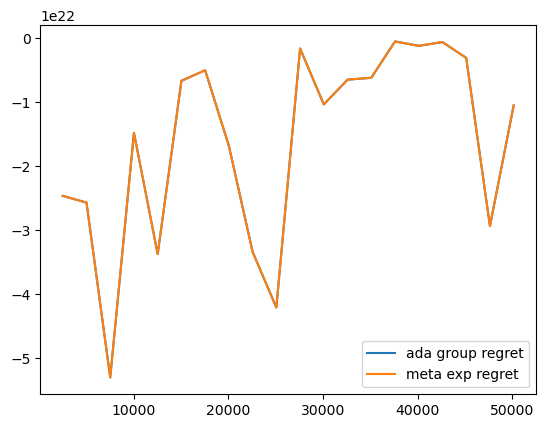

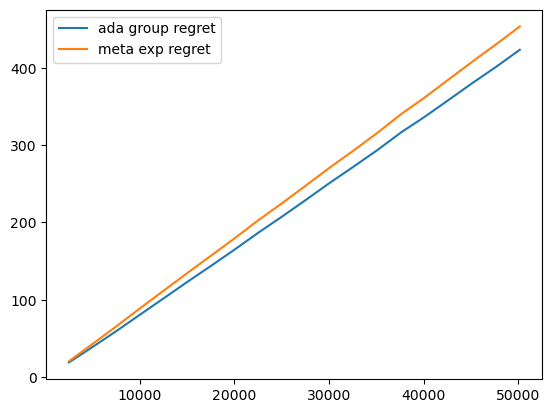

60847 (60847,) (60847,)
pos : [ 3042  6084  9126 12168 15211 18253 21295 24338 27380 30422 33465 36507
 39549 42592 45634 48676 51719 54761 57803 60846]
cl ada: [ 30.88422868  64.98971404  99.01138569 132.01180174 166.52765884
 200.2895578  233.48688043 266.84881648 301.73326104 334.01772367
 367.0002603  401.22248949 435.39926928 467.99391555 502.43328545
 534.26998944 568.28638208 601.275429   634.55510751 668.51475899]
cl meta exp: [ 30.68444845  64.7899338   98.81160546 131.8120215  166.3278786
 200.08977757 233.28710019 266.64903625 301.5334808  333.81794344
 366.80048007 401.02270926 435.19948904 467.79413532 502.23350521
 534.0702092  568.08660184 601.07564876 634.35532728 668.31497876]
sse [  5.29576654  10.9011316   16.40818964  21.60507907  27.03482316
  32.25960341  37.66706737  43.20754748  48.57581908  53.84778288
  59.3718635   64.54876867  69.92788833  75.15438483  80.76953296
  86.17302393  91.56346585  96.82340943 102.00471151 107.21399284]
thetasq  [1.34590152e-01 5.4

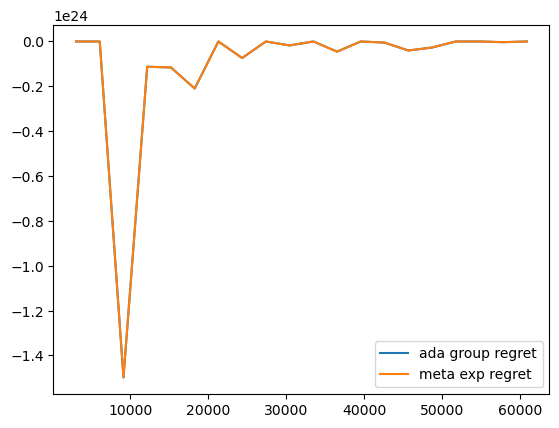

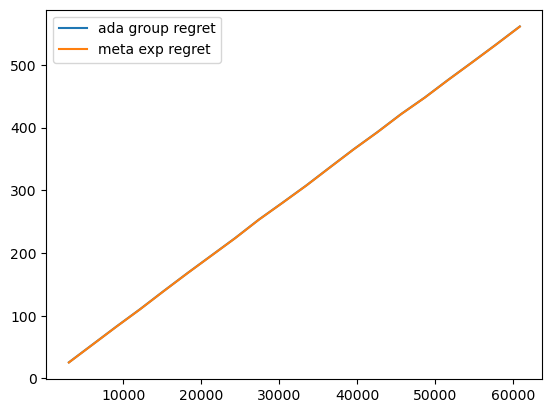

12061 (12061,) (12061,)
pos : [  603  1206  1809  2412  3015  3618  4221  4824  5427  6030  6633  7236
  7839  8442  9045  9648 10251 10854 11457 12060]
cl ada: [  5.75451513  11.22121978  17.9230345   23.64605316  30.03302795
  36.06344391  42.73472187  49.28688746  55.99771554  61.92506896
  68.77971502  75.37518672  81.86240375  88.76173558  95.52235469
 101.5773563  108.10912388 114.59188298 120.52962541 126.34589341]
cl meta exp: [  5.65782371  11.12452836  17.82634308  23.54936174  29.93633653
  35.96675249  42.63803045  49.19019605  55.90102412  61.82837754
  68.6830236   75.2784953   81.76571233  88.66504416  95.42566327
 101.48066489 108.01243246 114.49519156 120.43293399 126.24920199]
sse [ 0.89993508  1.83256549  2.74115133  3.71162083  4.71895781  5.692094
  6.60500349  7.53770689  8.48046275  9.4252575  10.39727    11.42503015
 12.43567784 13.39269064 14.33400306 15.31797444 16.26919323 17.27666448
 18.21665286 19.02923709]
thetasq  [1.35745096e-01 1.33587037e-01 3.5215085

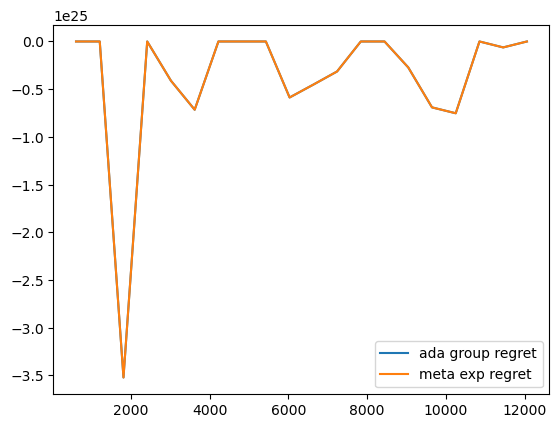

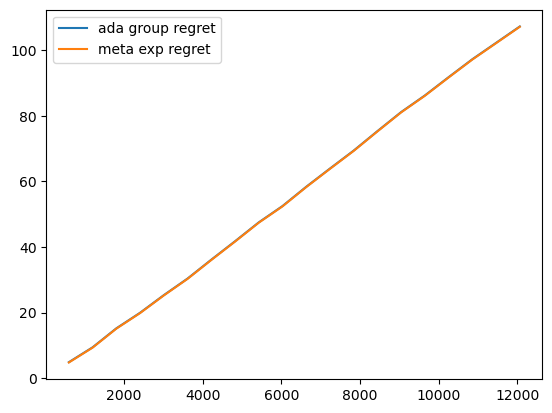

9974 (9974,) (9974,)
pos : [ 498  996 1495 1994 2492 2991 3490 3988 4487 4986 5484 5983 6482 6980
 7479 7978 8476 8975 9474 9973]
cl ada: [ 3.93660516  7.73920418 11.63320189 16.01133974 20.14336074 24.55332949
 28.92090896 33.16569369 37.14188371 41.35671315 45.70415017 50.32245867
 54.85814448 58.97966135 63.30924707 67.66810792 71.70581504 76.39680713
 80.50121752 84.87572091]
cl meta exp: [ 3.79028303  7.59288205 11.48687976 15.86501761 19.99703861 24.40700736
 28.77458682 33.01937156 36.99556158 41.21039102 45.55782804 50.17613654
 54.71182235 58.83333922 63.16292494 67.52178579 71.5594929  76.25048499
 80.35489539 84.72939877]
sse [0.39682114 0.76342897 1.21775588 1.63743014 1.96099649 2.35209019
 2.71966967 3.11592338 3.48664797 3.90254827 4.29739961 4.65161635
 5.02357013 5.34987425 5.73905225 6.09583255 6.47954428 6.81780164
 7.18758834 7.53540292]
thetasq  [1.14083525e-01 5.43405547e+25 1.14684392e-01 1.14072393e-01
 1.14538862e-01 1.15107401e-01 1.15305231e-01 1.15909546e-01

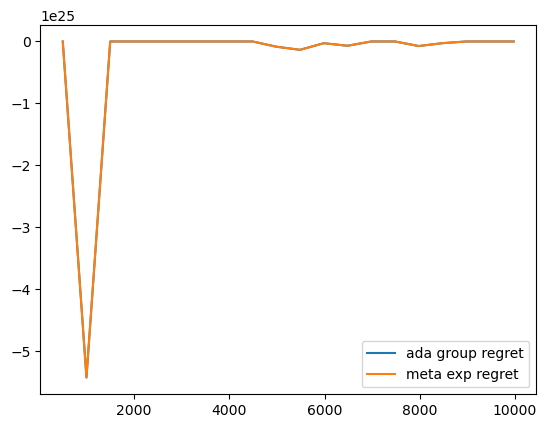

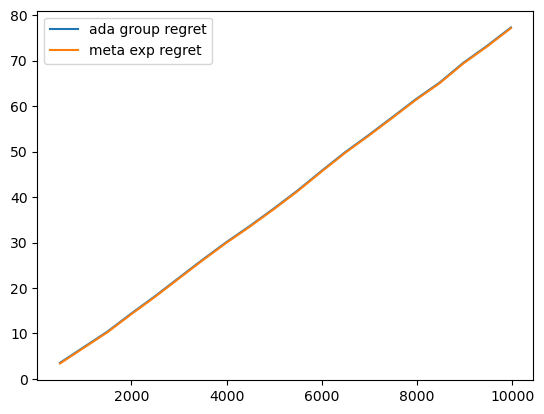

8029 (8029,) (8029,)
pos : [ 401  802 1203 1605 2006 2408 2809 3210 3612 4013 4415 4816 5218 5619
 6020 6422 6823 7225 7626 8028]
cl ada: [ 2.98735025  5.58643936  8.40350786 11.36538059 14.59976508 18.02138042
 21.17830022 24.73117899 27.6439101  31.01507964 34.34799528 37.37893353
 40.62060963 43.49811761 46.79318221 49.75357852 53.08373358 55.93489267
 58.8292719  62.07756019]
cl meta exp: [ 2.87017364  5.46926276  8.28633125 11.24820398 14.48258847 17.90420381
 21.06112361 24.61400238 27.52673349 30.89790303 34.23081867 37.26175692
 40.50343302 43.380941   46.67600561 49.63640191 52.96655697 55.81771606
 58.7120953  61.96038358]
sse [0.20142965 0.45659834 0.69137562 0.91749264 1.15788815 1.37268716
 1.63625152 1.83766787 2.07869573 2.31147139 2.53691843 2.80411018
 3.02409836 3.25441017 3.49069417 3.73133459 3.94398646 4.15838645
 4.36778452 4.57398824]
thetasq  [8.18166812e+24 1.09348619e-01 8.02210879e+24 1.09931338e-01
 1.10847797e-01 1.11297996e-01 2.55078400e+24 1.10807721e-01

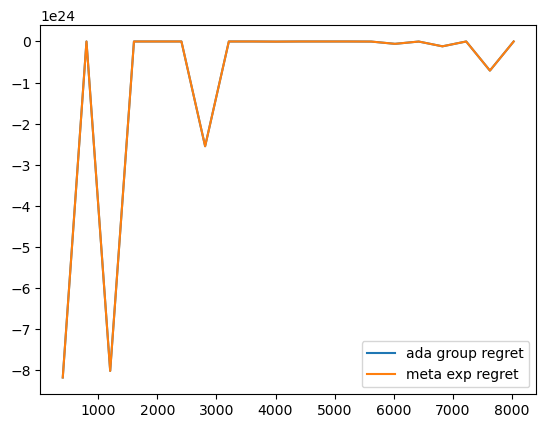

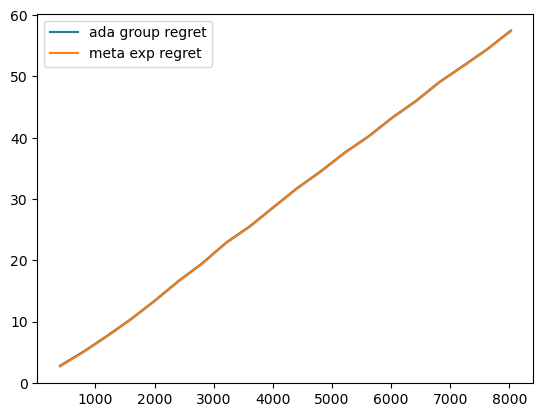

6050 (6050,) (6050,)
pos : [ 302  604  906 1209 1511 1814 2116 2419 2721 3024 3326 3629 3931 4234
 4536 4839 5141 5444 5746 6049]
cl ada: [ 2.5241694   4.44693254  6.64482602  8.97076692 11.25113229 13.66272816
 15.73899274 18.37462172 20.92270236 23.5134579  25.69202207 28.26269208
 30.759439   33.18531242 35.54376775 38.0918223  40.71860361 43.3331011
 45.76779279 48.32372218]
cl meta exp: [ 2.48534847  4.40811161  6.60600509  8.93194599 11.21231135 13.62390723
 15.7001718  18.33580079 20.88388143 23.47463697 25.65320114 28.22387115
 30.72061807 33.14649149 35.50494682 38.05300137 40.67978268 43.29428017
 45.72897186 48.28490125]
sse [0.21405315 0.39655739 0.5527702  0.73395707 0.93450848 1.12266508
 1.29099431 1.47043018 1.64268348 1.82683027 2.04939389 2.25180731
 2.44122781 2.61584748 2.79432313 2.97597058 3.17270532 3.3789911
 3.585698   3.78385966]
thetasq  [1.21026447e-01 1.18174855e-01 1.15837529e-01 3.26972111e+24
 1.15376426e-01 1.15081632e-01 6.14296329e+22 1.15157429e-01
 

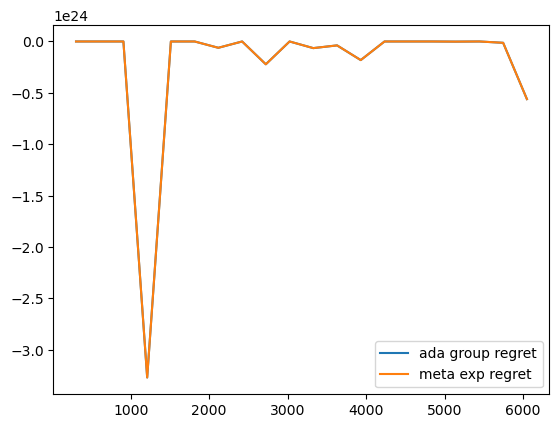

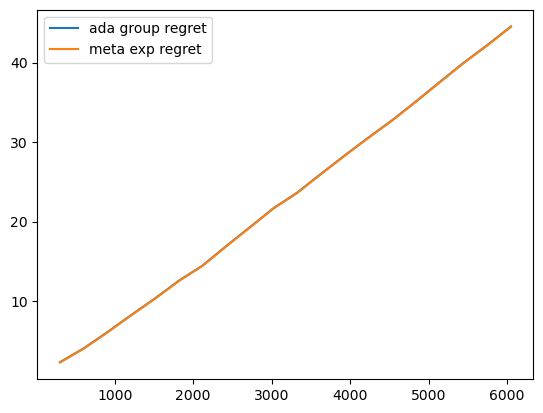

3039 (3039,) (3039,)
pos : [ 151  302  454  606  758  910 1062 1214 1366 1518 1670 1822 1974 2126
 2278 2430 2582 2734 2886 3038]
cl ada: [ 1.45346242  2.38446251  3.43286671  4.67648413  5.99367654  7.43626828
  8.60859581  9.94285094 11.59508824 12.86576141 14.29943769 15.82270037
 17.27522775 18.71651929 20.32445445 21.89412684 23.16141414 24.74578886
 26.43683375 27.9555241 ]
cl meta exp: [ 1.84812015  2.77912023  3.82752443  5.07114186  6.38833426  7.83092601
  9.00325354 10.33750867 11.98974597 13.26041914 14.69409542 16.2173581
 17.66988548 19.11117701 20.71911217 22.28878456 23.55607186 25.14044658
 26.83149148 28.35018183]
sse [0.16223282 0.34483039 0.50985739 0.68605982 0.86791744 1.02062416
 1.18227631 1.38595494 1.55489431 1.73045075 1.90821372 2.09262098
 2.29897498 2.51884128 2.71387693 2.91796409 3.09198488 3.27181674
 3.50204718 3.72344474]
thetasq  [1.36681016e-01 1.02620131e+25 1.30930134e-01 1.32975472e-01
 1.32319511e-01 1.33942309e-01 1.32273791e-01 1.32743181e-01


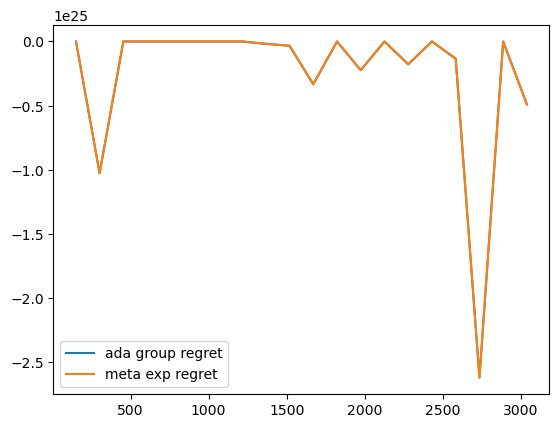

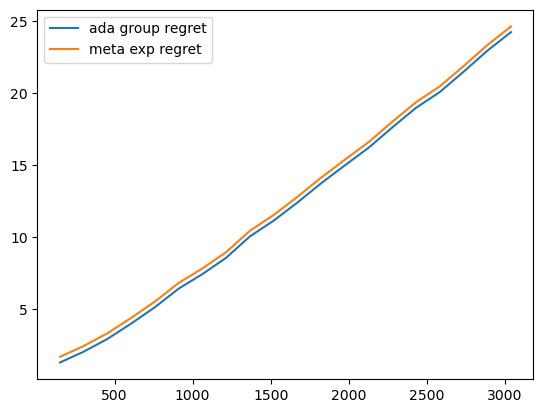

In [38]:
# cl_group_metaexp = Anhrm.cumloss_groupwise_metaexp TODO
Anh = Anh_dict_ridge['y_min_active'].Anh
for g_ind, gname in enumerate(filter_group):
    X_dat_g = df[df[gname] == 1][filter_feature + filter_group]
    y_dat_g = df[df[gname] == 1]['y_min_active']
    plot_Anh_minus_besthindsight(Anh.cumloss_groupwise_ada[g_ind], Anh.cumloss_groupwise_metaexp[g_ind], X_dat_g, y_dat_g, num_points = 20)

### 3 Sanity check that Anh - best in hindsight = Anh - group meta exp + (group meta exp - best in hindisght)

In [ ]:

def find_besthindsight(cl_metaexp_gname, X_dat_g, y_dat_g, num_points = 10):
    Tg = len(X_dat_g)
    sse = []
    thetasq = []
    # print(Tg)
    # print(Tg // num_points)
    pos = np.linspace(100, Tg-1, dtype = int, num = num_points)
    # print(len(pos))
    for p in pos:
        X_batch = X_dat_g[:p]
        y_batch = y_dat_g[:p]
        # print(X_dat_g.shape, y_batch.shape)
        lr = LinearRegression()
        lr.fit(X_batch, y_batch)
        sse.append(np.sum((lr.predict(X_batch) - y_batch)**2))
        thetasq.append(np.linalg.norm(lr.coef_)**2)
    sse = np.array(sse)
    thetasq = np.array(thetasq)
    # print(f"pos : {pos}")
    print(f"cl meta exp: {cl_metaexp_gname[pos]}")
    print(f"sse {sse}")
    print(f"thetasq  {thetasq}")
    print(f"meta exp - best hindsight loss {(cl_metaexp_gname[pos] - sse)}")
    # print(pos, cl_metaexp_gname[pos] - sse -thetasq)
    plt.plot(pos, cl_metaexp_gname[pos] - sse)
    plt.show()